In [1]:
import nltk

In [2]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')

In [4]:
len(emma)

192427

In [6]:
from nltk.corpus import gutenberg
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


In [7]:
from nltk.corpus import nps_chat

In [8]:
chatroom = nps_chat.posts('10-19-20s_706posts.xml')

In [9]:
chatroom[123]

['i',
 'do',
 "n't",
 'want',
 'hot',
 'pics',
 'of',
 'a',
 'female',
 ',',
 'I',
 'can',
 'look',
 'in',
 'a',
 'mirror',
 '.']

In [10]:
from nltk.corpus import brown

In [11]:
news_text = brown.words(categories='news')

In [12]:
fdist = nltk.FreqDist(w.lower() for w in news_text)

In [13]:
modals = ['can', 'could', 'may', 'might', 'must', 'will']

In [15]:
for m in modals:
    print(m, fdist[m], end=' ')

can 94 could 87 may 93 might 38 must 53 will 389 

In [16]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)

In [17]:
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']

In [18]:
modals = ['can', 'could', 'may', 'might', 'must', 'will']

In [19]:
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


In [20]:
from nltk.corpus import inaugural

In [21]:
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target)
)

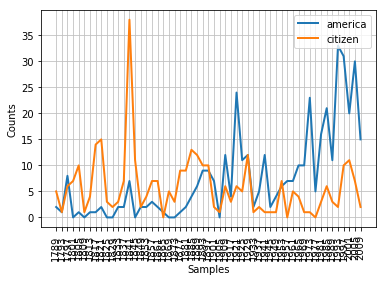

In [23]:
fig = cfd.plot()

In [24]:
nltk.corpus.udhr.fileids()

['Abkhaz-Cyrillic+Abkh',
 'Abkhaz-UTF8',
 'Achehnese-Latin1',
 'Achuar-Shiwiar-Latin1',
 'Adja-UTF8',
 'Afaan_Oromo_Oromiffa-Latin1',
 'Afrikaans-Latin1',
 'Aguaruna-Latin1',
 'Akuapem_Twi-UTF8',
 'Albanian_Shqip-Latin1',
 'Amahuaca',
 'Amahuaca-Latin1',
 'Amarakaeri-Latin1',
 'Amuesha-Yanesha-UTF8',
 'Arabela-Latin1',
 'Arabic_Alarabia-Arabic',
 'Asante-UTF8',
 'Ashaninca-Latin1',
 'Asheninca-Latin1',
 'Asturian_Bable-Latin1',
 'Aymara-Latin1',
 'Balinese-Latin1',
 'Bambara-UTF8',
 'Baoule-UTF8',
 'Basque_Euskara-Latin1',
 'Batonu_Bariba-UTF8',
 'Belorus_Belaruski-Cyrillic',
 'Belorus_Belaruski-UTF8',
 'Bemba-Latin1',
 'Bengali-UTF8',
 'Beti-UTF8',
 'Bichelamar-Latin1',
 'Bikol_Bicolano-Latin1',
 'Bora-Latin1',
 'Bosnian_Bosanski-Cyrillic',
 'Bosnian_Bosanski-Latin2',
 'Bosnian_Bosanski-UTF8',
 'Breton-Latin1',
 'Bugisnese-Latin1',
 'Bulgarian_Balgarski-Cyrillic',
 'Bulgarian_Balgarski-UTF8',
 'Cakchiquel-Latin1',
 'Campa_Pajonalino-Latin1',
 'Candoshi-Shapra-Latin1',
 'Caquinte-Latin

In [25]:
nltk.corpus.indian.words('hindi.pos')

['पूर्ण', 'प्रतिबंध', 'हटाओ', ':', 'इराक', 'संयुक्त', ...]

In [26]:
from nltk.corpus import udhr

In [31]:
languages = ['Chickasaw', 'English', 'German_Deutsch']

In [32]:
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1')
)

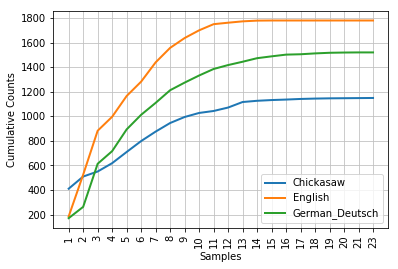

In [33]:
fig = cfd.plot(cumulative=True)

In [34]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()

In [35]:
text = nltk.corpus.genesis.words('english-kjv.txt')

In [36]:
bigrams = nltk.bigrams(text)

In [37]:
cfd = nltk.ConditionalFreqDist(bigrams)

In [38]:
cfd['living']

FreqDist({'creature': 7, 'thing': 4, 'substance': 2, 'soul': 1, '.': 1, ',': 1})

In [ ]:
gene